<a href="https://colab.research.google.com/github/Karishma-Kuria/Assignment1-DL-CMPE-258/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gradient Descent**

In this colab I have showcased Gradient Descent without using any library.
It is the important part of machine learning algorithms.
This algorithm provides the results by recursively iterating with some initial parameters and then minimizing some cost or gradient function which is the descent part. The best result is achieved by taking the differentiation of the variables or properties involved towards the direction of the downhill slope or decreasing slope.

### **Functional Requirements for Fradient Descent**

Gradient Descent function only works for function which have following properties:


1.   Differentiable
2.   Convex



### **Linear Regression**

A linear regression line has the following equation
Y = a + bx

where b is the slope of the line and a is the intercept (value of y when x=0)
Y is the dependent variable and X is the explanatory variable.

In [ ]:
# imorting relevant libraries for creating data and plotting graphs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create Data

### Here I have created the data points that follow linear equation x=y.

In [ ]:
np.random.seed(42)
x_data = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y_data = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

In [20]:
x_data

array([ 0.24835708, -0.06913215,  0.32384427,  0.76151493, -0.11707669,
       -0.11706848,  0.78960641,  0.38371736, -0.23473719,  0.27128002,
       -0.23170885, -0.23286488,  0.12098114, -0.95664012, -0.86245892,
       -0.28114376, -0.50641556,  0.15712367, -0.45401204, -0.70615185,
        1.73282438,  0.88711185,  1.0337641 ,  0.28762591,  0.72780864,
        1.05546129,  0.42450321,  1.18784901,  0.69968066,  0.85415313,
        0.69914669,  1.92613909,  0.99325139,  0.47114454,  1.41127246,
        0.38957818,  1.1044318 ,  0.02016494,  0.33590698,  1.09843062,
        2.36923329,  2.08568414,  1.94217586,  1.84944815,  1.260739  ,
        1.6400779 ,  1.76968061,  2.52856111,  2.17180914,  1.11847992,
        2.16204198,  1.80745886,  1.661539  ,  2.30583814,  2.51549976,
        2.46564006,  1.58039124,  1.84539381,  2.16563172,  2.48777256,
        2.76041288,  2.90717051,  2.44683251,  2.40189669,  3.40626291,
        3.67812001,  2.96399494,  3.50176645,  3.18081801,  2.67

In [21]:
y_data

array([-0.35384269, -0.10516133, -0.08567863, -0.20056932, -0.04032143,
        0.10101271,  0.47154648,  0.04364445,  0.0643876 , -0.01861148,
       -0.4796928 , -0.00662847,  0.01505755,  0.61581053, -0.04809024,
        0.07538684, -0.00867794, -0.29216951,  0.2857057 ,  0.18798326,
        1.19775799,  0.77265314,  1.35069858,  0.64953723,  1.14671427,
        1.54761391,  0.75236592,  0.85842557,  1.02491284,  0.87413109,
        0.61233414,  1.01714074,  0.73442407,  1.11839811,  0.77014394,
        1.3874836 ,  0.80418668,  0.91948462,  1.2033793 ,  0.69228392,
        2.05686498,  2.32678569,  1.59812919,  2.04615846,  2.0649707 ,
        2.19545572,  1.69076232,  1.66988585,  2.13048539,  2.07424617,
        2.06262321,  2.08661205,  1.82999382,  2.05806342,  2.07326812,
        1.82141215,  2.46644363,  2.11845823,  1.70217413,  2.1641384 ,
        2.75632958,  3.19677115,  3.28964889,  2.79482942,  3.24084403,
        3.10319523,  3.20551504,  3.47419825,  2.93865297,  2.81

### Plotting the data to check the relation between them

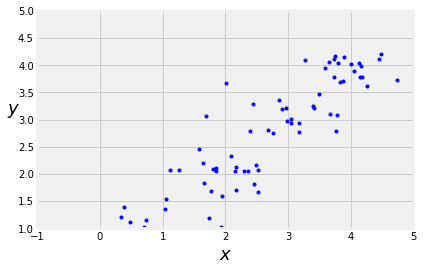

In [ ]:
plt.plot(x_data,y_data,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([-1,5,1,5])

### Gradient Descent Class

### Here I have used learning rate = 0.01 for 1000 number of iterations.

In [ ]:
# class to perform gradient descent for linear regression
class gradient_Descent_LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X_value, y_value):
        b = 0
        m = 5
        n = X_value.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y_value - m*X_value + b) / n
            m_gradient = -2 * np.sum(X_value*(y_value - (m*X_value + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
        # model prediction
    def predict(self, X_value):
        return self.m*X_value + self.b

### Applying Gradient descent on the above created data.

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

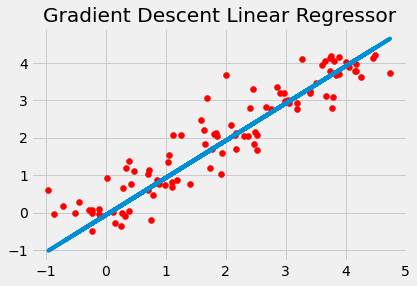

In [ ]:
# calling gradient descent class 
model = gradient_Descent_LinearRegression()
model.fit(x_data, y_data)

plt.style.use('fivethirtyeight')

plt.scatter(x_data, y_data, color='red')
plt.plot(x_data, model.predict(x_data))
plt.gca().set_title("Gradient Descent Linear Regressor")

The result of the model is very close to ideal solution for m=1 and b=0.

## **Stochastic Gradient Descent**

Stochastic gradient descent improves on the limitation of Gradient Descent Algo. It performs much better in large scale datasets.
As the name suggests stochastic means random. It performs differentiation in random samples. Taking one sample at a time makes the algo much faster becuase it has less data to manipulate in every iteration.

The below 'gradient_descent_stocashtic' function uses following parameters:


1.   X_value: Matrix of X with bias units added
2.   y_value: Vector of Y
3.   theta:   Vector of thetas np.random.randn(j,1)
4.   learning_rate
5.   iterations: number of iterations

And this function returns the final theta vector and cost history array over total number of iterations.

I have also added the 'cost_cal' function which calculates the cost for given x and y.

In [ ]:
# defing cost calculation function
def  cost_cal(theta,x,y):
    m = len(y)
    
    predictions = x.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent_stocashtic(X_value,y_value,theta,learning_rate=0.01,iterations=10):
    m = len(y_value)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X_value[rand_ind,:].reshape(1,X_value.shape[1])
            y_i = y_value[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_cal(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

For learning rate 0.5 and 50 iterations I have called the stochastic gradient descent function.

In [ ]:
lrate =0.5
total_iter = 50

theta = np.random.randn(2,1)

# data to points
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

X = np.c_[np.ones((len(X),1)),X]
theta,cost_history_val = gradient_descent_stocashtic(X,y,theta,lrate,total_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history_val[-1]))

Theta0:          4.165,
Theta1:          2.850
Final cost/MSE:  34.993


Plotting Theata and iteration graph.

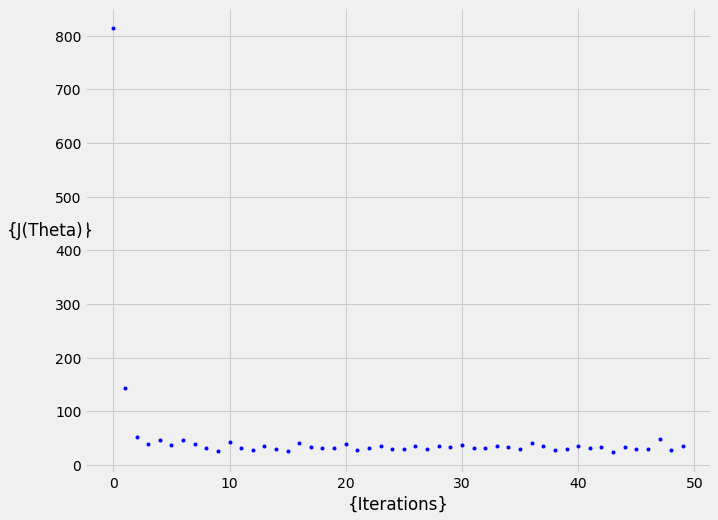

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(total_iter),cost_history_val,'b.')

The best advantage of using Gradient Descent is that here we don't require to have any fundamental pre-occupied knowledge of the model. We can apply the classifier build in above steps without having knowledge of linear regression. It can be applied to any model metric till the time it has 2 features, 1. its concave and 2. Differentiable.